In [53]:
import pandas as pd
import  numpy  as  np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from pandas_ml import ConfusionMatrix

In [54]:
raw_data_file_name= "Clustered_Data/dilum_sir_route_without_duplications_radius_5_samplesize_7_Fourier.json"
raw_data = pd.read_json(raw_data_file_name)
raw_data.head(5)

,anomaly,cluster,lat,lon
0,A,0,6.752597,79.956236
1,A,0,6.752549,79.956222
2,A,0,6.752520,79.956216
3,A,0,6.752499,79.956196
4,A,0,6.752487,79.956179


In [55]:
raw_data.shape

(10283, 4)

In [56]:
raw_data = raw_data.sort_values(by=['cluster'])

In [57]:
raw_data.head(5)

,anomaly,cluster,lat,lon
0,A,0,6.752597,79.956236
8518,A,0,6.752508,79.956244
8517,A,0,6.752547,79.956243
1318,A,0,6.752549,79.956222
8516,A,0,6.752566,79.956244


In [58]:
raw_data = raw_data.groupby(['cluster']).mean()
raw_data

,lat,lon
cluster,,
0,6.752515,79.956213
1,6.751981,79.955240
2,6.751852,79.954951
3,6.751563,79.954533
4,6.750764,79.954026
5,6.747744,79.952243
6,6.746838,79.952181
7,6.745455,79.951876
8,6.745261,79.951693


In [59]:
raw_data.head()

,lat,lon
cluster,,
0,6.752515,79.956213
1,6.751981,79.955240
2,6.751852,79.954951
3,6.751563,79.954533
4,6.750764,79.954026


In [60]:
raw_data.shape

(440, 2)

In [61]:
raw_data = pd.DataFrame(raw_data).reset_index()

In [62]:
raw_data.head()

,cluster,lat,lon
0,0,6.752515,79.956213
1,1,6.751981,79.955240
2,2,6.751852,79.954951
3,3,6.751563,79.954533
4,4,6.750764,79.954026


In [63]:
raw_data.shape

(440, 3)

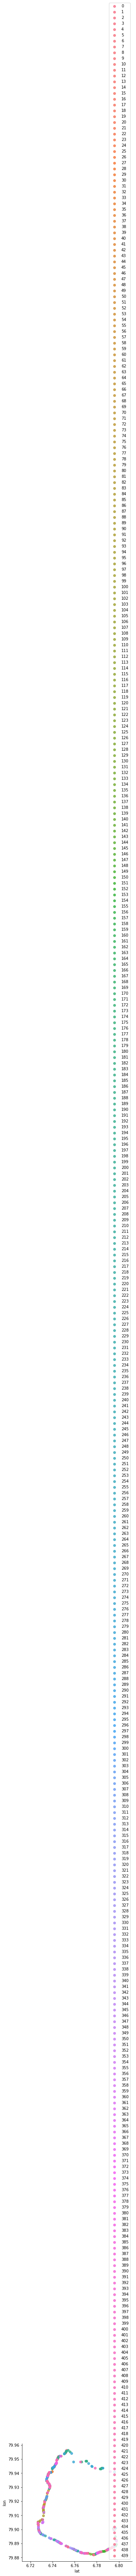

In [64]:
import seaborn as sns
#df = sns.load_dataset('iris')
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="lat", y="lon", data=raw_data, fit_reg=False, hue='cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

In [65]:
raw_data.to_json("Map_data/dilum_sir_route_without_duplications_radius_5_samplesize_7_Fourier.json", orient='records')